In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor,export_graphviz
import graphviz
import dtreeviz
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from pypinyin import pinyin, lazy_pinyin, Style

In [2]:
def word_to_py(word):
    temp = pinyin(word,style=Style.FIRST_LETTER)
    result = ""
    for one_word in [_[0] for _ in temp]:
        result+=str(one_word).upper()
    return result

In [3]:
# 决策树保存路径
model_path = r"F:\cache_data\model_path\dy\soil_type\cart"
model_name = "cart_tree.pkl"

In [4]:
dataset = pd.read_csv(r"F:\cache_data\frequency_filter\dy\scaler_csv\dy_stander_DLDZ.csv")
dataset.dropna(inplace=True)
dataset.columns

Index(['Unnamed: 0', 'TZ', 'DEM', 'AnalyticalHillshading', 'Aspect',
       'ChannelNetworkBaseLevel', 'ChannelNetworkDistance',
       'ClosedDepressions', 'ConvergenceIndex', 'LSFactor', 'PlanCurvature',
       'ProfileCurvature', 'RelativeSlopePosition', 'Slope',
       'TopographicWetnessIndex', 'TotalCatchmentArea', 'ValleyDepth',
       'Contrast', 'Correlation', 'Dissimilarity', 'Entropy', 'Homogeneity',
       'Mean', 'ndvi', 'PCA_0', 'PCA_1', 'SecondMoment', 'Variance', 'PRE',
       'SRA', 'TMP', 'VAP', 'WIND', 'BIO', 'LON', 'LAT', 'PH', 'DL', 'DZ'],
      dtype='object')

In [5]:
dataset = dataset.drop(columns=dataset.columns[:1])
dataset.columns

Index(['TZ', 'DEM', 'AnalyticalHillshading', 'Aspect',
       'ChannelNetworkBaseLevel', 'ChannelNetworkDistance',
       'ClosedDepressions', 'ConvergenceIndex', 'LSFactor', 'PlanCurvature',
       'ProfileCurvature', 'RelativeSlopePosition', 'Slope',
       'TopographicWetnessIndex', 'TotalCatchmentArea', 'ValleyDepth',
       'Contrast', 'Correlation', 'Dissimilarity', 'Entropy', 'Homogeneity',
       'Mean', 'ndvi', 'PCA_0', 'PCA_1', 'SecondMoment', 'Variance', 'PRE',
       'SRA', 'TMP', 'VAP', 'WIND', 'BIO', 'LON', 'LAT', 'PH', 'DL', 'DZ'],
      dtype='object')

In [6]:
# 标签化
dataset["TZ_label"] = dataset.TZ.astype("category").cat.codes
result = dataset.groupby('TZ_label')["TZ"].apply(lambda x: list(x.unique())).to_dict()
print(result)

{0: ['101'], 1: ['102'], 2: ['103'], 3: ['104'], 4: ['105'], 5: ['106'], 6: ['107'], 7: ['108'], 8: ['112'], 9: ['113'], 10: ['114'], 11: ['115'], 12: ['116'], 13: ['117'], 14: ['118'], 15: ['119'], 16: ['11e'], 17: ['120'], 18: ['125'], 19: ['126'], 20: ['129'], 21: ['12b'], 22: ['12c'], 23: ['12d'], 24: ['12e'], 25: ['12f'], 26: ['130'], 27: ['131'], 28: ['132'], 29: ['135'], 30: ['136'], 31: ['137'], 32: ['138'], 33: ['139'], 34: ['13d'], 35: ['13e'], 36: ['13f'], 37: ['143'], 38: ['14d'], 39: ['14e'], 40: ['14f'], 41: ['15'], 42: ['15d'], 43: ['15e'], 44: ['15f'], 45: ['18d'], 46: ['1e'], 47: ['1f'], 48: ['21'], 49: ['22'], 50: ['23'], 51: ['24'], 52: ['26'], 53: ['29'], 54: ['2b'], 55: ['2f'], 56: ['30'], 57: ['31'], 58: ['32'], 59: ['33'], 60: ['34'], 61: ['4d'], 62: ['4e'], 63: ['4f'], 64: ['61d'], 65: ['61e'], 66: ['61f'], 67: ['63'], 68: ['63b'], 69: ['63d'], 70: ['63e'], 71: ['63f'], 72: ['64d'], 73: ['64f'], 74: ['65'], 75: ['65d'], 76: ['65e'], 77: ['67'], 78: ['68'], 79: [

In [18]:
dataset['DZ']=dataset['DZ'].astype('category')
dataset['DL']=dataset['DL'].astype('category')
dataset['TZ_label']=dataset['TZ_label'].astype('category')

In [19]:
dataset.dtypes

TZ                           object
DEM                         float64
AnalyticalHillshading       float64
Aspect                      float64
ChannelNetworkBaseLevel     float64
ChannelNetworkDistance      float64
ClosedDepressions           float64
ConvergenceIndex            float64
LSFactor                    float64
PlanCurvature               float64
ProfileCurvature            float64
RelativeSlopePosition       float64
Slope                       float64
TopographicWetnessIndex     float64
TotalCatchmentArea          float64
ValleyDepth                 float64
Contrast                    float64
Correlation                 float64
Dissimilarity               float64
Entropy                     float64
Homogeneity                 float64
Mean                        float64
ndvi                        float64
PCA_0                       float64
PCA_1                       float64
SecondMoment                float64
Variance                    float64
PRE                         

In [20]:
features = dataset.columns[1:-1]
target = "TZ_label"

In [21]:
X = dataset[features]
y = dataset[target]
# 分割训练集和测试集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# 通过网格搜索找到最优超参数
params = {'criterion':['gini','entropy'], 'max_depth':list(range(2,100,10))} 
grid_tree = GridSearchCV(DecisionTreeClassifier(), params, cv=StratifiedKFold(n_splits=5))
grid_tree.fit(Xtrain, ytrain)
print(grid_tree.best_params_)

d:\worker_code\.venvgis\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.


{'criterion': 'entropy', 'max_depth': 52}


In [23]:

random_state = 42
tree_classifier = DecisionTreeClassifier(random_state=42,**grid_tree.best_params_)
# tree_classifier = DecisionTreeClassifier(random_state=42,criterion='gini', max_depth=5)
tree_classifier.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=52, random_state=42)

In [24]:
# 保存模型
with open(os.path.join(model_path,model_name), 'wb') as f:
    pickle.dump(tree_classifier, f)
    
# 加载模型
with open(os.path.join(model_path,model_name), 'rb') as f:
    predictor = pickle.load(f)

In [25]:
predictor = tree_classifier
# 查看准确率
y_test_pred= predictor.predict(Xtest)
y_train_pred = predictor.predict(Xtrain)
accuracy_test = accuracy_score(ytest,y_test_pred)
accuracy_train = accuracy_score(ytrain,y_train_pred)
print(accuracy_train,accuracy_test)

1.0 0.6839945280437757


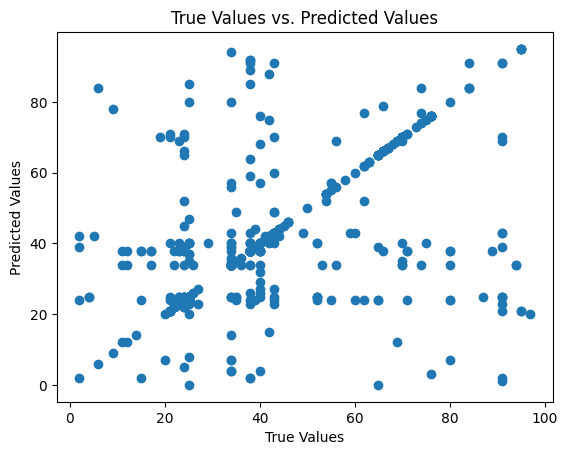

In [26]:
# 预测散点图
plt.scatter(ytest.values, y_test_pred)

# 添加标签和标题
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')

# 显示图表
plt.show()

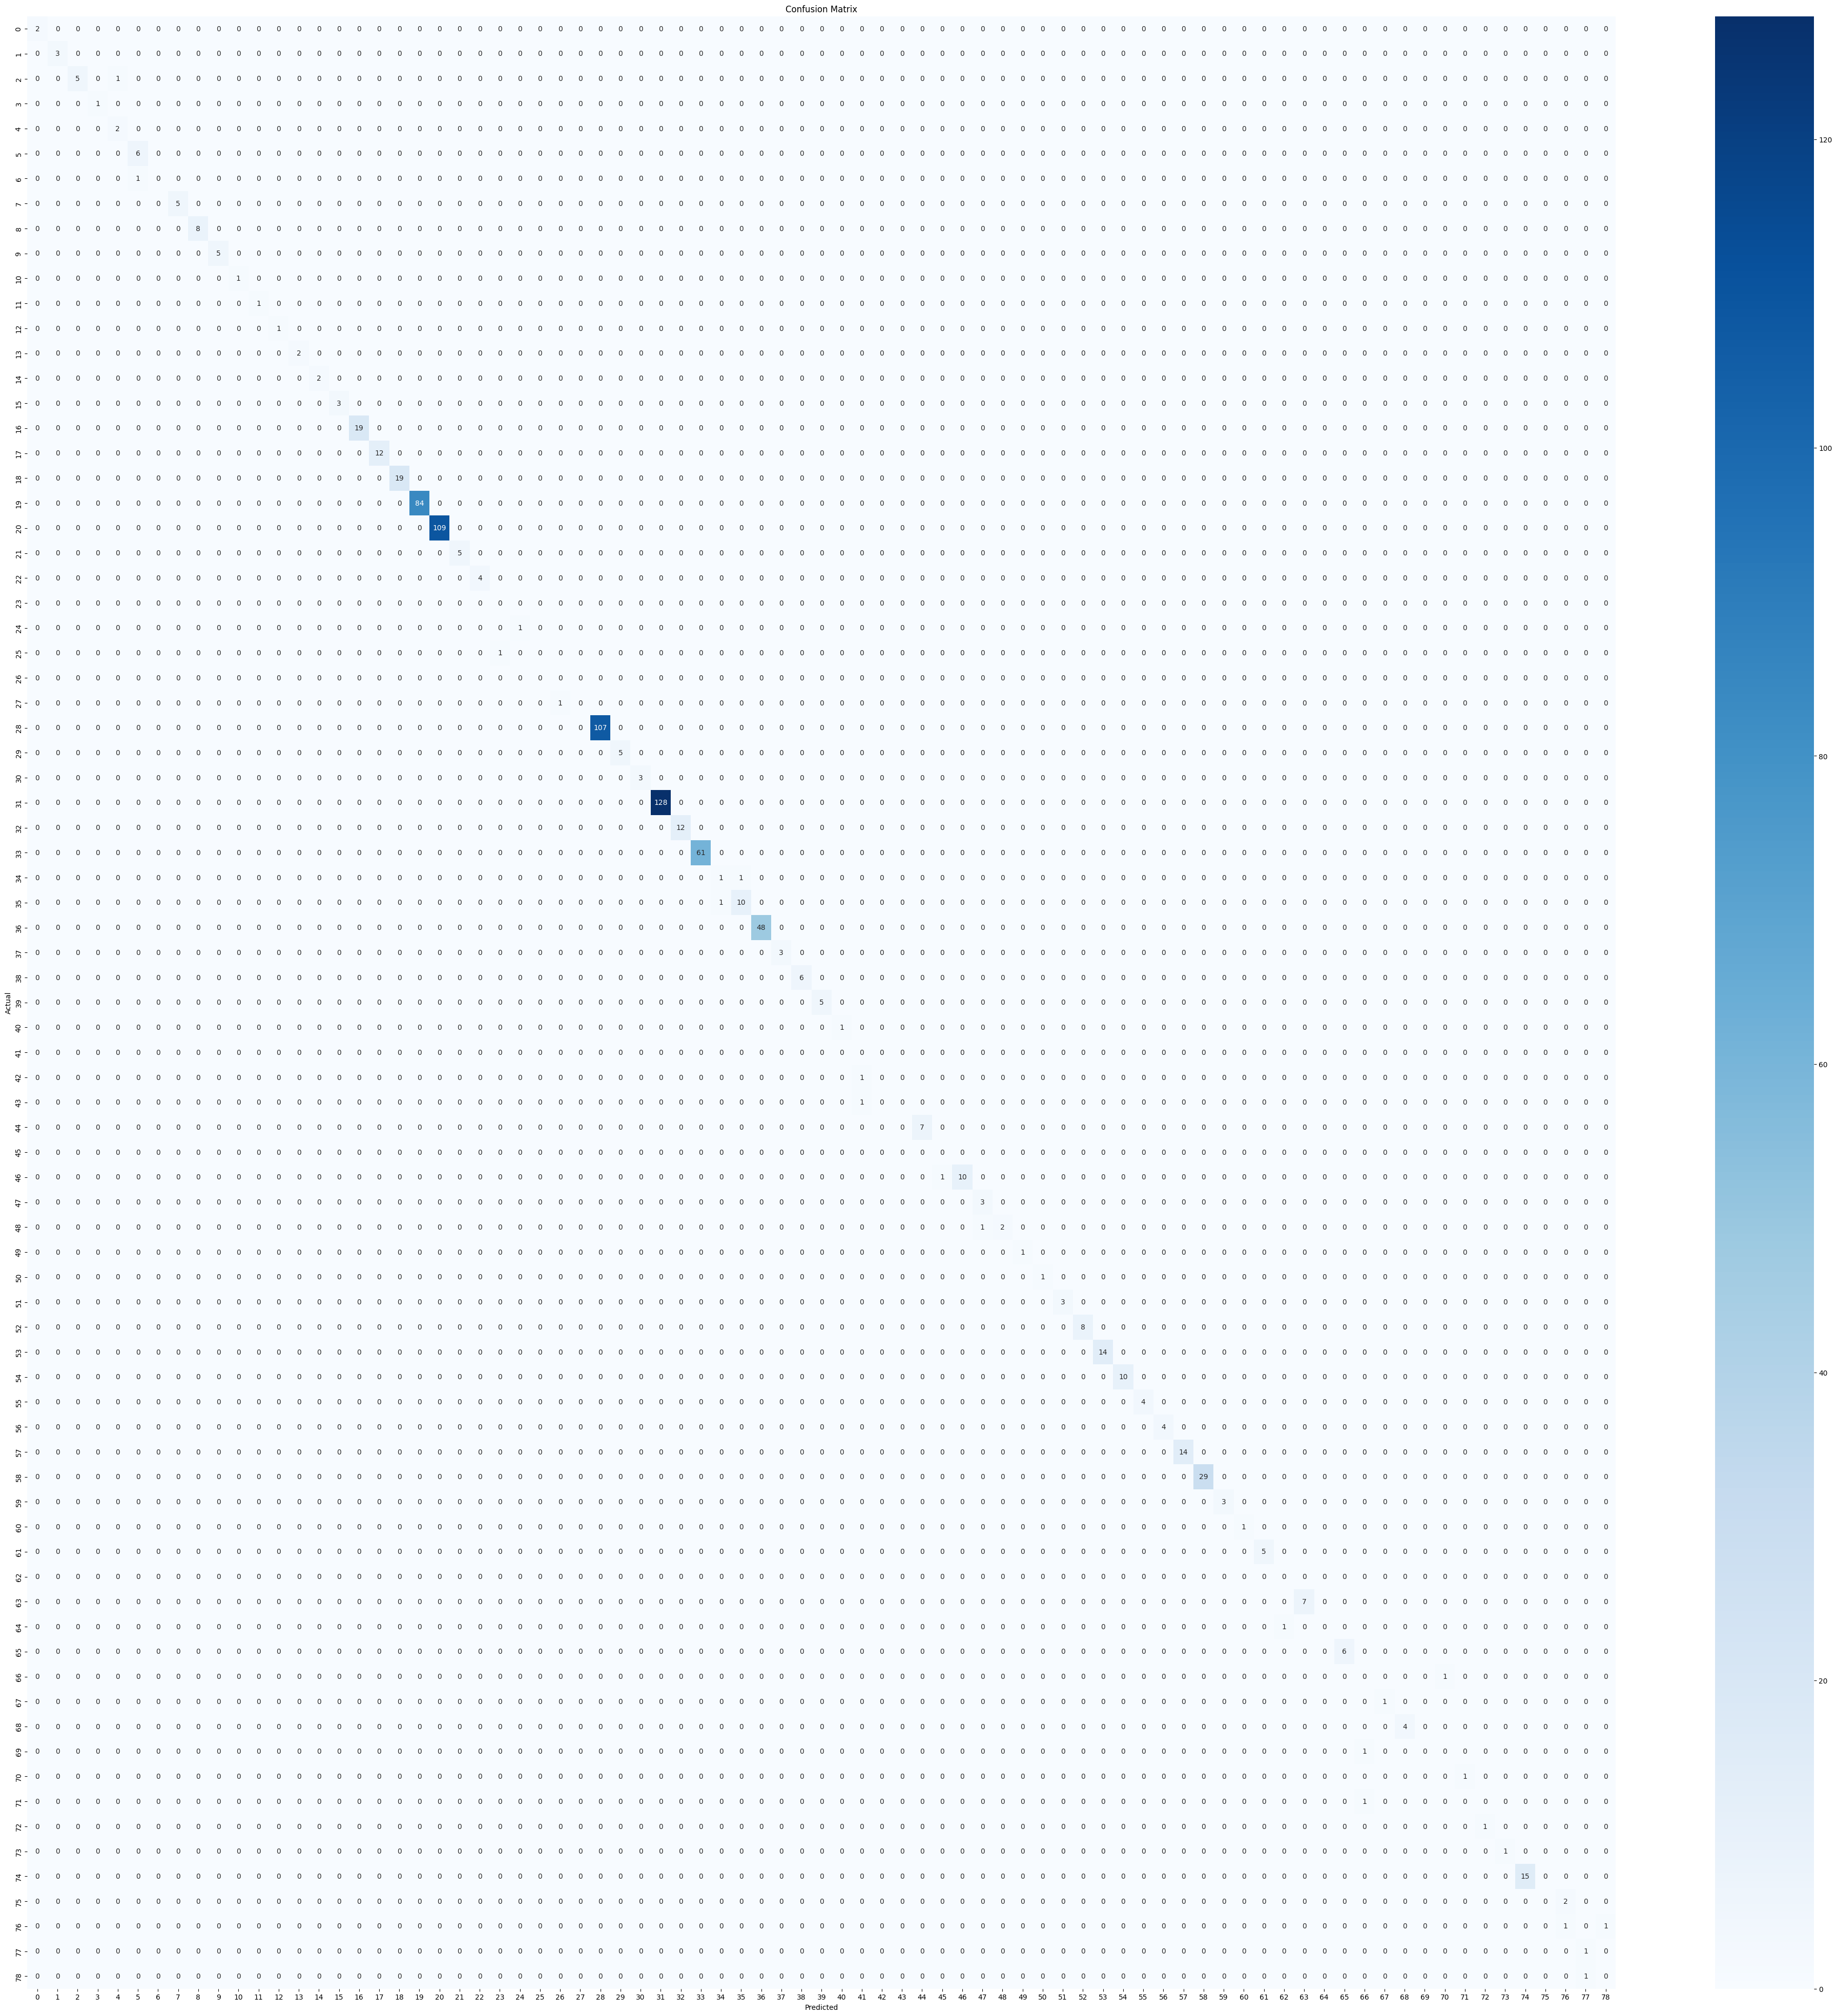

In [16]:
# 绘制混淆矩阵
cm = confusion_matrix(ytest, y_test_pred)
plt.figure(figsize=(50,50))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [29]:
name_label = [_[0] for _ in list(result.values())]


In [30]:
viz_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target, class_names= name_label)

In [27]:
viz_model = dtreeviz.model(predictor,
                           X_train=Xtrain, y_train=ytrain,
                           feature_names=features,
                           target_name=target)

In [ ]:
viz_model.view()

In [ ]:
viz_model.view(fancy=False)